<a href="https://colab.research.google.com/github/Om21o7/COMP3132_labs/blob/main/LabWeek11/LabWeek11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to deep learning for computer vision

## Import packages

**Name:** Om Makwana

**Student ID:** 101414422

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Import MNIST DataSet

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Do some sanity check on the data**
- what is the shape of train and test set and the corresponding labels?
- How many data points are there in train and test set?
- Print a sample data point from train
- show the sample datapoint with `imshow` (pass cmap="gray" argument to see the image in black and white)  

In [ ]:
#TODO: your sanity checks for imported dataset

In [ ]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
print("Number of training samples:", len(train_images))
print("Number of test samples:", len(test_images))


Number of training samples: 60000
Number of test samples: 10000


In [ ]:
print("Sample data point from train set:")
print(train_images[0])


Sample data point from train set:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

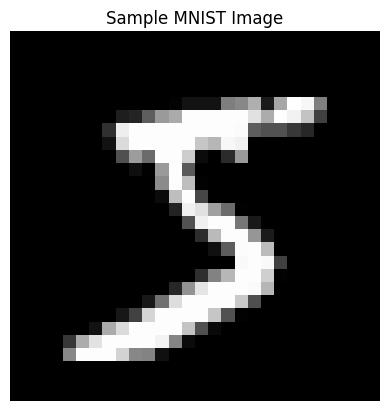

In [ ]:
plt.imshow(train_images[0], cmap="gray")
plt.title("Sample MNIST Image")
plt.axis("off")
plt.show()


## Data preprocessing

In [ ]:
# Reshape the training images to have a shape of (60000, 28, 28, 1),
# where 60000 is the number of images,
# 28x28 is the image size,
# and 1 represents the single color channel (grayscale).
train_images = train_images.reshape((60000, 28, 28, 1))

# Convert pixel values from integers (0-255) to floating-point numbers (0.0-1.0)
# for better model performance.
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

New train images shape: (60000, 28, 28, 1)
New test images shape: (10000, 28, 28, 1)
Train images min value: 0.0
Train images max value: 1.0
Test images min value: 0.0
Test images max value: 1.0


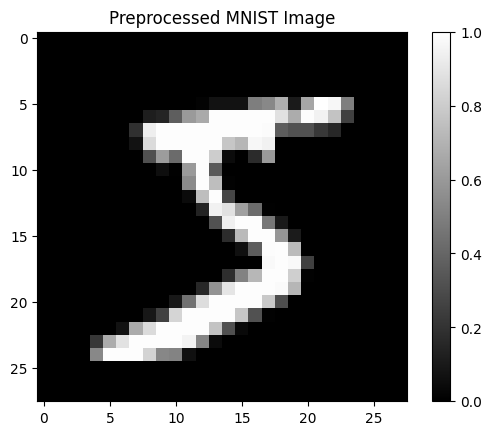

In [ ]:
# Check the new shapes
print("New train images shape:", train_images.shape)
print("New test images shape:", test_images.shape)

# Check the range of values
print("Train images min value:", train_images.min())
print("Train images max value:", train_images.max())
print("Test images min value:", test_images.min())
print("Test images max value:", test_images.max())

# Visualize a preprocessed image to ensure it looks correct
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title("Preprocessed MNIST Image")
plt.colorbar()
plt.show()


## Part A: Introduction to convnets

**Visualizing the conv operarion 3-chanel images**
- image size = (5 x 5 x 3)
- kernel_size = 3
- stride = 1
- padding = no padding

In [ ]:
from IPython.display import display, HTML

gif_url = "https://raw.githubusercontent.com/PyDataGBC/PyML2025/main/LabWeek11/assets/Conv2d_0p_1s_3inCh.gif"
display(HTML(f'<img src="{gif_url}" width="600" height="400">'))  # Adjust size as needed

**Instantiating a small convnet**




![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek11/assets/image.png)

**Note:** Suppose n1=32 and n2=64

**We can instantiate the model in TensorFlow in two ways.**

**Approach 1: Sequential API**

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Approach 2: Functioanl API**
- In Keras' functional API, each layer acts like a function that transforms an `input` tensor.
- When you pass inputs through multiple layers, Keras records the entire sequence of transformations.
- `model = keras.Model(inputs, outputs)` connects the dots, forming a complete model from `inputs` to `outputs`.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# each layer acts like a function
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=5, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Sequential API is easier however with functioal API non-Sequential Connections Allowed: You can create models with branches, residual connections (like ResNet), or multi-input/multi-output structures.

**Displaying the model's summary**

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

**Instantiate your own model with the following architecture and then display the summary of the model**

- Input layer
- Conv2D with `filter`=32 and `kernel_size`=3
- MaxPooling2d with `pool_size`=2
- Conv2D with `filter`=64 and `kernel_size`=3
- MaxPooling2d with `pool_size`=2
- Conv2D with `filter`=128 and `kernel_size`=3
- Flatten layer
- Output layer (for 10 classes)

**Note:** Use functioal API to define your model


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define model architecture using Functional API
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Create model
model = keras.Model(inputs=inputs, outputs=outputs)

# Display model summary
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling and Training the convnet on MNIST images**

**Note 1:** Use `loss="sparse_categorical_crossentropy"`

**Note 2:** Train for 5 `epochs` with `batch_size`=64

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.1  # Using 10% of training data for validation
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8758 - loss: 0.4258 - val_accuracy: 0.9867 - val_loss: 0.0495
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9835 - loss: 0.0540 - val_accuracy: 0.9862 - val_loss: 0.0440
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9890 - val_loss: 0.0375
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9934 - loss: 0.0228 - val_accuracy: 0.9898 - val_loss: 0.0385
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9907 - val_loss: 0.0350


**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0403
Test accuracy: 0.990


## Part B: Training a convnet from scratch on a small dataset

**In this Kaggle competition, you'll write an algorithm to classify whether images contain either a dog or a cat (binary classification)**

**Try to get the accuracy above 80%**

### Downloading the data

We need to load `kaggle.json` (your Kaggle API key file). This is necessary to configure the Kaggle API for downloading datasets or interacting with Kaggle from the command line.

**TODO:** Get your API key from Kaggle

**Steps to Download `kaggle.json`**
1. Go to [Kaggle](https://www.kaggle.com/)

    - Visit Kaggle and log in to your account.

2. Go to API Settings

    - Click on your profile picture (top-right corner).
    - Select `Setting` from the dropdown menu.
    - Select `Account` tab
    - Scroll down to the "API" section.

3. Download API Key

  - Click "Create New API Token" (or "Generate New Token" if you already have one). This will download a file named kaggle.json to your computer.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"drastiparikh","key":"8ac9b68ba432a6537a03122497167e29"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**TODO:** Go to [Dogs Vs Cats competion page](https://www.kaggle.com/c/dogs-vs-cats/overview) and then `Data` tab and join the competition.  

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:19<00:00, 41.5MB/s]
100% 812M/812M [00:19<00:00, 43.6MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

### Data preprocessing (For this section just run the cells)

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Displaying the the data and labels yielded by the `Dataset`

`train_dataset`, `validation_dataset`, and `test_dataset` behave like a **generator** in the sense that it **yields data lazily** when iterated over, instead of loading everything into memory at once.

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    sample_batch = data_batch
    sample_labels = labels_batch
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


label tf.Tensor(1, shape=(), dtype=int32)


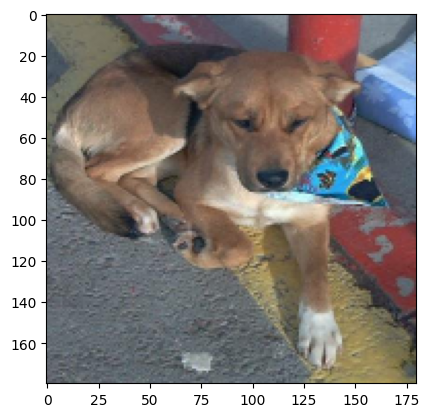

In [ ]:
print("label", sample_labels[10])
plt.imshow(sample_batch[10].numpy().astype("uint8"))

**TODO: Visualize some other samples from the batch with their corresponding labels.**

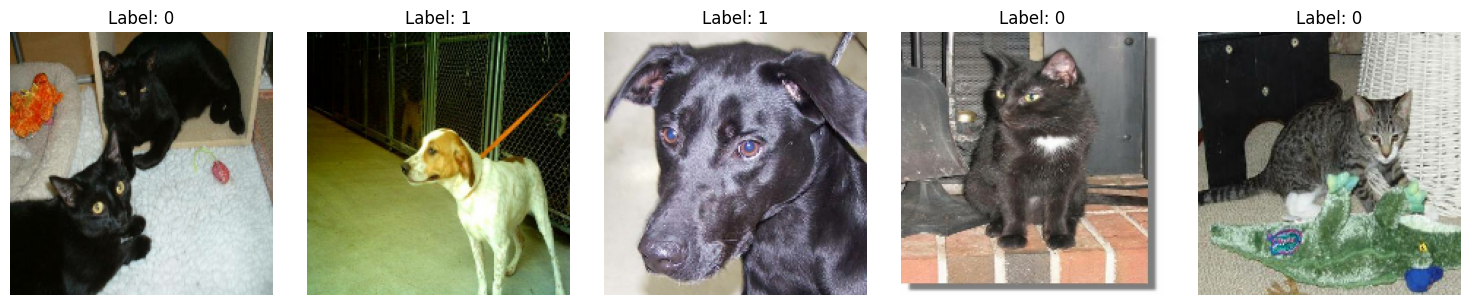

In [ ]:
import matplotlib.pyplot as plt

# Function to display images with labels
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 5 sample images with their labels
display_images(sample_batch, sample_labels, num_images=5)


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#TODO: Add here a Conv2D with filters=64, kernel_size=3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

#TODO: Add here MaxPooling2d
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

Compile the model for the binary classification task.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Fitting the model using a `Dataset`**

In [ ]:
#This is a callback that saves the model during training.
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", #The model will be saved to this file.
        save_best_only=True,  # Only saves the model if the validation loss (val_loss) improves
        monitor="val_loss")   # The model checkpointing is based on the validation loss,
                              # whenever val_loss decreases, the model is saved.

]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.5159 - loss: 0.6993 - val_accuracy: 0.5870 - val_loss: 0.6854
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5840 - loss: 0.6802 - val_accuracy: 0.5000 - val_loss: 0.6865
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5011 - loss: 0.6939 - val_accuracy: 0.5080 - val_loss: 0.6835
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5176 - loss: 0.6904 - val_accuracy: 0.5920 - val_loss: 0.7188
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5317 - loss: 0.6860 - val_accuracy: 0.6240 - val_loss: 0.6608
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5911 - loss: 0.6710 - val_accuracy: 0.6170 - val_loss: 0.6575
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6527 - loss: 0.6423 - val_accuracy: 0.6660 - val_loss: 0.6043
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6494 - loss: 0.6095 - val_accuracy: 0.6840 -

**Displaying curves of loss and accuracy during training**

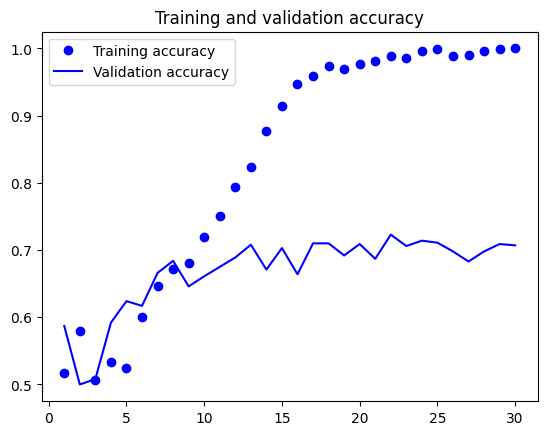

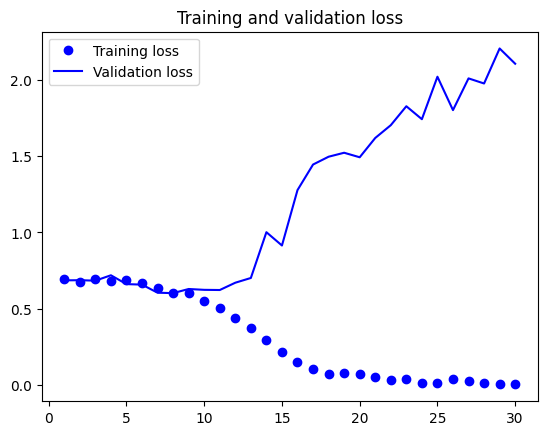

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate the model on the test set
test_loss, test_accuracy = test_model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6761 - loss: 0.6276
Test accuracy: 0.6670
Test loss: 0.6326


### Using data augmentation (Optional)

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

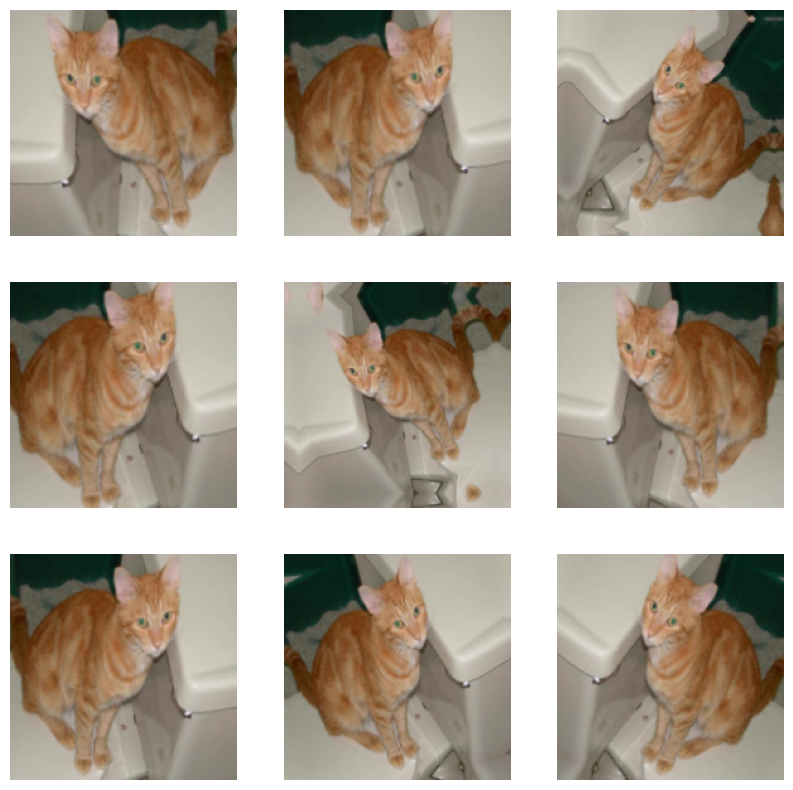

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset:
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
    break

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)         #This line is new - add more data to prevent overfitting
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)            #This line is new - to prevent overfitting
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

Train the new model for 100 epochs and save it in `convnet_from_scratch_with_augmentation.keras` path.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.4936 - loss: 0.7956 - val_accuracy: 0.5000 - val_loss: 0.8030
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5057 - loss: 0.7039 - val_accuracy: 0.5830 - val_loss: 0.6913
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5304 - loss: 0.6941 - val_accuracy: 0.5020 - val_loss: 0.8098
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5418 - loss: 0.6932 - val_accuracy: 0.5920 - val_loss: 0.6669
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.5857 - loss: 0.6754 - val_accuracy: 0.5670 - val_loss: 0.6635
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6333 - loss: 0.6511 - val_accuracy: 0.6410 - val_loss: 0.6155
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6566 - loss: 0.6384 - val_accuracy: 0.6460 - val_loss: 0.6161
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.6832 - loss: 0.6012 - val_accuracy: 0.

**Plot curves of loss and accuracy during training**

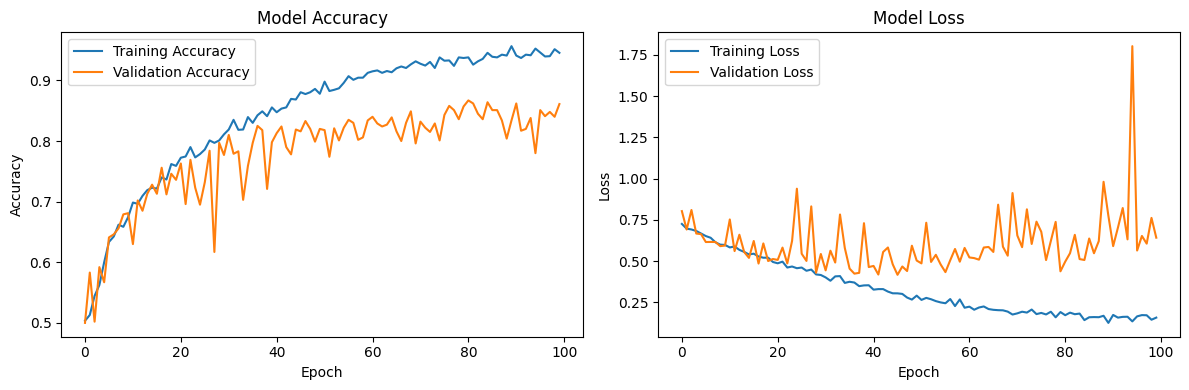

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8217 - loss: 0.4330
Test accuracy: 0.803
